# **Develop a linear regression model for forecasting time series data**

Mean Squared Error: 140384.90685312016


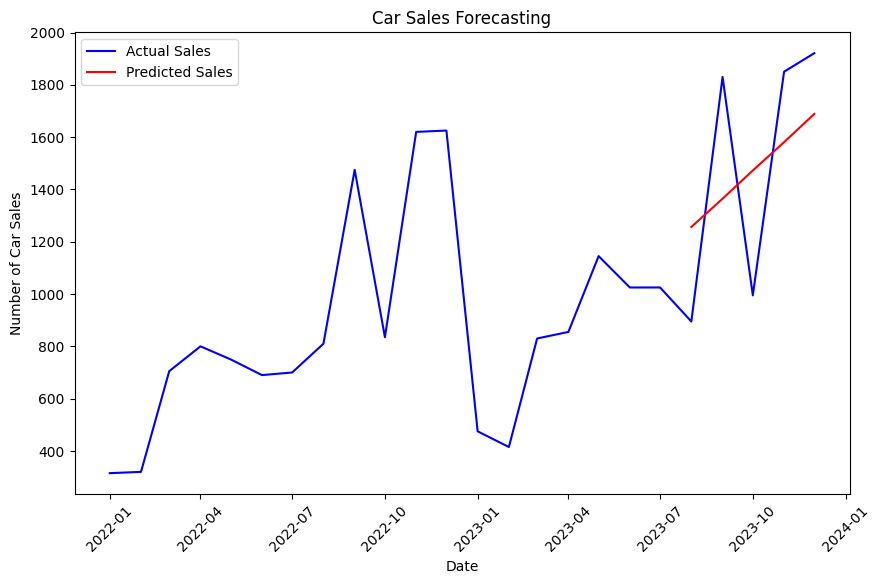

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load data (replace with the correct path)
df = pd.read_csv("Car Sales.xlsx - car_data (2).csv")

# Convert the date column to datetime (adjust 'Date' column name if needed)
df['date'] = pd.to_datetime(df['Date'])

# Extract Year, Month, and Day from the 'date' column
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year

# Group data by Year and Month to get the total sales per month
df_sales = df.groupby(['Year', 'Month'])['Car_id'].count().reset_index()
df_sales['Date'] = pd.to_datetime(df_sales[['Year', 'Month']].assign(DAY=1))

# Define features (Year, Month) and target (Car sales count)
X = df_sales[['Year', 'Month']]
y = df_sales['Car_id']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.plot(df_sales['Date'], df_sales['Car_id'], label='Actual Sales', color='blue')
plt.plot(pd.to_datetime(X_test[['Year', 'Month']].assign(DAY=1)), y_pred, label='Predicted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Number of Car Sales')
plt.title('Car Sales Forecasting')
plt.xticks(rotation=45)
plt.legend()
plt.show()
